### Enter your name(s) here:

In [1]:
#  Pierce Kotarski, Jerry Che


# Assignment 2: Naive Bayes and KNN using scikit-learn

In this assignment you'll implement the Naive Bayes and KNN classifier to classify patients as either having or not having diabetic retinopathy. For this task we'll be using the same Diabetic Retinopathy data set which was used in the previous assignment on decision trees. You can find additional details about the dataset [here](http://archive.ics.uci.edu/ml/datasets/Diabetic+Retinopathy+Debrecen+Data+Set).

You'll explore how to train Naive Bayes and KNN classifiers using the `scikit-learn` library. The scikit-learn documentation can be found [here](http://scikit-learn.org/stable/documentation.html).

In [2]:
#You may add additional import if you want
import warnings
warnings.simplefilter("ignore")
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import time
from sklearn.neighbors import KNeighborsClassifier

In [3]:
%matplotlib inline

In [4]:
# Read the data from csv file
col_names = []
for i in range(20):
    if i == 0:
        col_names.append('quality')
    if i == 1:
        col_names.append('prescreen')
    if i >= 2 and i <= 7:
        col_names.append('ma' + str(i))
    if i >= 8 and i <= 15:
        col_names.append('exudate' + str(i))
    if i == 16:
        col_names.append('euDist')
    if i == 17:
        col_names.append('diameter')
    if i == 18:
        col_names.append('amfm_class')
    if i == 19:
        col_names.append('label')

original_data = pd.read_csv("messidor_features.txt", names = col_names)
print(original_data.shape)
original_data.head(10)

(1151, 20)


,quality,prescreen,ma2,ma3,ma4,ma5,ma6,ma7,exudate8,exudate9,exudate10,exudate11,exudate12,exudate13,exudate14,exudate15,euDist,diameter,amfm_class,label
0,1,1,22,22,22,19,18,14,49.895756,17.775994,5.270920,0.771761,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1,0
1,1,1,24,24,22,18,16,13,57.709936,23.799994,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0,0
2,1,1,62,60,59,54,47,33,55.831441,27.993933,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0,1
3,1,1,55,53,53,50,43,31,40.467228,18.445954,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0,0
4,1,1,44,44,44,41,39,27,18.026254,8.570709,0.410381,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0,1
5,1,1,44,43,41,41,37,29,28.356400,6.935636,2.305771,0.323724,0.000000,0.000000,0.000000,0.000000,0.502831,0.126741,0,1
6,1,0,29,29,29,27,25,16,15.448398,9.113819,1.633493,0.000000,0.000000,0.000000,0.000000,0.000000,0.541743,0.139575,0,1
7,1,1,6,6,6,6,2,1,20.679649,9.497786,1.223660,0.150382,0.000000,0.000000,0.000000,0.000000,0.576318,0.071071,1,0
8,1,1,22,21,18,15,13,10,66.691933,23.545543,6.151117,0.496372,0.000000,0.000000,0.000000,0.000000,0.500073,0.116793,0,1
9,1,1,79,75,73,71,64,47,22.141784,10.054384,0.874633,0.099780,0.023386,0.000000,0.000000,0.000000,0.560959,0.109134,0,1


## Part 1: Naive Bayes Classifier
Naive Bayes (NB) classifier is a simple probabilistic classifier that is based on applying the Bayes' theorem and assumes a strong (naive) independence between features.

`sklearn.naive_bayes.GaussianNB` implements the Gaussian Naive Bayes algorithm for classification. This means that the liklihood of continuous features is estimated using a Gaussian distribution. (Refer to slide 13 of the Naive Bayes powerpoint notes.)

Q1. Create a `sklearn.naive_bayes.GaussianNB` classifier. Use `sklearn.model_selection.cross_val_score` to do a 10-fold cross validation on the classifier. Display the accuracy.

In [5]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

labels = original_data['label']
data = original_data.drop(['label'], axis = 1)


clf = GaussianNB()
clf.fit(data, labels)

scores = cross_val_score(clf, data, labels ,cv = 10)
print("Scores: ", scores)
print("Accuracy: ", scores.mean()*100)



Scores:  [0.61206897 0.56521739 0.63478261 0.53913043 0.6        0.66086957
 0.56521739 0.54782609 0.60869565 0.64347826]
Accuracy:  59.77286356821588


Q2. Show the confusion matrix, precision, recall, and F1 score of your classifier.
* `cross_val_score` returns the scores of every test fold. There is another function called `cross_val_predict` that returns predicted y values for every record in the test fold. In other words, for each element in the input, `cross_val_predict` returns the prediction that was obtained for that element when it was in the test set. Use `cross_val_predict` and `sklearn.metrics.confusion_matrix` to print the confusion matrix for the classifier.

* `sckit-learn` also provides a useful function `sklearn.metrics.classification_report` for evaluating the classifier on a per-class basis. It is a text summary of the precision, recall, and F1 score for each class (support is just the actual class count). Display the classification report for your Naive Bayes classifier.

In [6]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(clf, data, labels, cv = 10)

print(confusion_matrix(labels, predictions))

print(classification_report(labels, predictions))


    

[[502  38]
 [425 186]]
              precision    recall  f1-score   support

           0       0.54      0.93      0.68       540
           1       0.83      0.30      0.45       611

   micro avg       0.60      0.60      0.60      1151
   macro avg       0.69      0.62      0.56      1151
weighted avg       0.69      0.60      0.56      1151



Q3. Receiver Operating Characteristic (ROC) curves are a nice way to see how any predictive model can distinguish between the true positives and negatives. It is a plot of the true positive rate against the false positive rate for the different possible thresholds of a binary classifier.

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity)
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the classifier
- The area under the curve is a measure of the classifier accuracy

Using `sklearn.metrics.roc_curve` plot a ROC curve for the Naive Bayes classifier. Also calculate the area under the curve (AUC) using `sklearn.metrics.roc_auc_score`.

* We will just do this on a single holdout test set (because it gets more complicated to put this inside of a cross-validation). So, split your data into trainng and test sets using `sklearn.model_selection.train_test_split`. Do an 80/20 split.
* Fit the Naive Bayes classifier to the training data by calling the `fit` method on the trainng data.
* Now call the `predict_proba` method on your classifier and pass in the test data. This will return a 2D numpy array with one row for each datapoint in the test set and 2 columns. Column index 0 is the probability that this datapoint is in class 0, and column index 1 is the probability that this datapoint is in class 1.
* We are going to say that class 1 (having the disease) is the rare/positive class. To create a ROC curve, pass the actual Y labels and the probabilites of class 1 (column index 1 out of your predict_proba result) into `sklearn.metrics.roc_curve`
* Pass the fpr and tpr that `roc_curve` returns into the plotting code that we have provided you.
* Print the AUC (area under the curve) by using `sklearn.metrics.roc_auc_score`

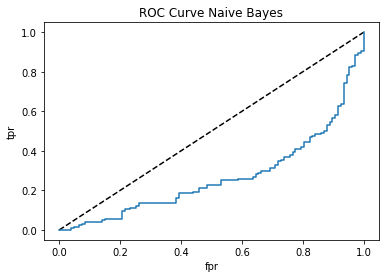

0.26620440156768166


In [7]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.svm.libsvm import predict_proba

data_train, data_test, labels_train, labels_test = train_test_split(data, labels, test_size=0.2)
clf.fit(data_train, labels_train)

probabilities = clf.predict_proba(data_test)

probabilities = [row[0] for row in probabilities]
labels_test = labels_test.tolist()

#replace these fpr and tpr with the results of your roc_curve
fpr, tpr, extra = roc_curve(labels_test, probabilities)


# Do not change this code! This plots the ROC curve.
# Just replace the fpr and tpr above with the values from your roc_curve
plt.plot([0,1],[0,1],'k--') #plot the diagonal line
plt.plot(fpr, tpr, label='NB') #plot the ROC curve
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve Naive Bayes')
plt.show()

auc = roc_auc_score(labels_test, probabilities)
print(auc)


## Part 2: K Nearest Neighbor (KNN) Classifier

The KNN classifier consists of two stages:-
- In the training stage, the classifier takes the training data and simply memorizes it (KNN is a lazy learner)
- In the test stage, the classifier compares the test data with the training data and simply returns the maximum occuring label of the k nearest data points.

The distance calculation method is central to the algorithm, typically Euclidean distance is used but other distance metrics like Manhattan distance can also be used. By default `sklearn.neighbors.KNeighborsClassifier` uses the Euclidean distance as its metric. 

Q4. Notice that you did not scale the data prior to runnng Naive Bayes. But it is critical to scale the data before running Nearest Neighbor. Explain why we don't need to scale the data for NB, but do need to for NB.

In [8]:
'''
Naive Bayes is fundamentally based on weather an element belongs to class A or B. Therefore the degree to which its
data differs from any neighbors or other data points will not make an effect on the machine learning algorithm as 
a whole. 

On the other hand, the KNN uses the a nearest neighbor calculation to understand which elements are more likely to 
belong to which class. Therefore, position is inherenetly going to alter the probability of each class. To ensure 
that outlier datapoints do not skew the data severely, the data must be standardized. 
'''

'\nNaive Bayes is fundamentally based on weather an element belongs to class A or B. Therefore the degree to which its\ndata differs from any neighbors or other data points will not make an effect on the machine learning algorithm as \na whole. \n\nOn the other hand, the KNN uses the a nearest neighbor calculation to understand which elements are more likely to \nbelong to which class. Therefore, position is inherenetly going to alter the probability of each class. To ensure \nthat outlier datapoints do not skew the data severely, the data must be standardized. \n'

Q5. Use `sklearn.preprocessing.MinMaxScaler` to normalize the dataset’s features from [0,1]. Use the normalized dataset moving forward. Note that MinMaxScaler returns a numpy array.

In [9]:
from sklearn.preprocessing import MinMaxScaler

data = MinMaxScaler().fit_transform(data)

Q6. Use `sklearn.neighbors.KNeighborsClassifier` and fit the classifier on the normalized training set for `k = 5`. Use a 10-fold CV to display precision, recall and accuracy values.

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelBinarizer
from sklearn import preprocessing


lbin = preprocessing.LabelBinarizer()

lbin.fit(labels)

neigh = KNeighborsClassifier(n_neighbors = 5)
scores = cross_val_score(neigh, data, labels ,cv = 10)

print("Accuracy: ", scores.mean()*100)
print("Precision: ", (cross_val_score(neigh, data, labels ,cv = 10, scoring = 'precision')).mean()*100)
print("Recall: ", (cross_val_score(neigh, data, labels ,cv = 10, scoring = 'recall')).mean()*100)



Accuracy:  63.51124437781108
Precision:  67.18874900877266
Recall:  62.3532522474881


Q7. Use `sklearn.model_selection.GridSearchCV` to find the best value of k for this data. Try k values from 1-30. Display the best value of k.

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
par ={"n_neighbors":[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]}
grid_search = GridSearchCV(neigh, par, cv = 10,scoring="accuracy")

grid_search.fit(data, labels)

print(grid_search.best_params_)



{'n_neighbors': 23}


Q8. Display the accuracy, precision, and recall of a KNN classifier using the value of k that you just found. (Note that the values are improved because you're using the optimal k for this data!)

In [12]:
best_neigh = KNeighborsClassifier(n_neighbors = 23)
scores1 = cross_val_score(best_neigh, data, labels ,cv = 10)

print("Accuracy: ", scores1.mean()*100)
print("Precision: ", (cross_val_score(best_neigh, data, labels ,cv = 10, scoring = 'precision')).mean()*100)
print("Recall: ", (cross_val_score(best_neigh, data, labels ,cv = 10, scoring = 'recall')).mean()*100)

Accuracy:  66.02923538230885
Precision:  71.32781696578259
Recall:  60.56054997355896


Q8. Now wrap the whole process in another cross-validation to report the final accuarcy of your KNN model. 

To perform the nested cross-validation that we discussed in class, you'll now need to pass the `GridSearchCV` into a `cross_val_score`. 

What this does is: the `cross_val_score` splits the data in to train and test sets for the first fold, and it passes the train set into `GridSearchCV`. `GridSearchCV` then splits that set into train and validation sets for k number of folds (the inner CV loop). The hyper-parameters for which the average score over all inner iterations is best, is reported as the `best_params_`, `best_score_`, and `best_estimator_`(best decision tree). This best decision tree is then evaluated with the test set from the `cross_val_score` (the outer CV loop). And this whole thing is repeated for the remaining k folds of the `cross_val_score` (the outer CV loop). 

That is a lot of explanation for a very complex (but IMPORTANT) process, which can all be performed with a single line of code!

Be patient for this one to run. The nested cross-validation loop can take some time. A [*] next to the cell indicates that it is still running.

Print the accuracy, precision, and recall of your tuned, cross-validated model. This is the official accuracy, precision, recall that you would report for your model.

In [13]:
nested_score = cross_val_score(grid_search, data, labels, cv=10)

print("Accuracy:", nested_score.mean()*100)

C:\Users\jerry\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Accuracy: 65.50749625187406


Q9. We discussed why dimensionality reduction is critical to KNN because of the curse of dimensionality. So we may want to perform a dimensionality reduction with PCA before running KNN. (Remember that you can also reduce dimensionality by performing feature selection and feature engineering.) 

An important note about PCA is that is should only be performed on the **training** data, then you transform the test data into the PCA space that was found on the training data. 

So when you are doing cross-validation, the PCA needs to happen *inside of your CV loop*. This way, it is performed on the training set for the first fold, then the test set is put into that space. On the second fold, it is performed on the trainng set for the second fold, and the test set is put into that space. And so on for the remaining folds. 

In order to do this with Python, you must create what's called a `Pipeline` and pass that in to the cross validation. This is a very important concept for Data Mining and Machine Learning, so let's practice it here.

We have provided some of the necessary code for you, but this code is not complete. You need to finish it by doing the following:
* pass the pipeline and the parameters into a `GridSearchCV` with a 5-fold cross validation
* call `fit()` on the GridSearchCV and pass in the normalized data (X_values, Y_values)
* print out the `best_score_` and `best_params_` from the GridSearchCV

This will show you the best number of principal components to keep (number of dimensions) and the best value of k to use (number of neighbors).

[Then of coure you'd want to wrap this GridSearchCV in another cross-validation to do a nested cross-validation and get an accuracy estimate. But we'll leave that for another time! :) ]

Again, be patient for this one to run. The GridSearchCV can take some time. A [*] next to the cell indicates that it is still running.


In [14]:
# Define a pipeline to search for the best combination of PCA truncation and n_neighbors.

from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

#create a PCA
pca = PCA()

#create a KNN classifier
knn = KNeighborsClassifier()

#create a pipeline that does a PCA and a KNN
pipe = Pipeline(steps=[('pca', pca), ('knn', knn)])

#Set up the parameters you want to tune for each of your pipeline steps
#Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    'pca__n_components': list(range(1, 19)), #find how many principal componenet to keep
    'knn__n_neighbors': list(range(1, 30)),  #find the best value of k
}

# your code goes here:
# pass the pipeline and the parameters into a GridSearchCV with a 5-fold cross validation
grid_search = GridSearchCV(pipe, param_grid, cv = 5,scoring="accuracy")
# call fit() on the GridSearchCV and pass in the normalized data (X_values, Y_values)
grid_search.fit(data,labels)

# print out the best_score_ and best_params_ from the GridSearchCV
print(grid_search.best_score_)
print(grid_search.best_params_)

0.6602953953084274
{'knn__n_neighbors': 21, 'pca__n_components': 8}
